In [24]:
#Manejo de datos
import pandas as pd
#Manejo de tensores
import numpy as np
#Graficación
import seaborn as sns
import matplotlib.pyplot as plt

# **Exploración**

In [25]:
#Cargar los datos originales 
df = pd.read_csv('../data/student-mat.csv', sep=';')
#Crear una copia de los datos para procesarlos 
datos = df.copy()
#Revisar primeros 10 ejemplos
datos.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [ ]:
#Crear nuevo objetivo 
#El dataset se maneja con notas de 1 a 20 donde 10 es donde pasa y menor a este es donde pierde
datos['aprueba'] = datos['G3'].apply(lambda x: 1 if x >= 10 else 0)
#Retirar G3 ya que tiene casi la misma informacion o la necesaria para clasificar y vamos a clasificar basandonos en otros features
datos = datos.drop('G3', axis=1)

In [27]:
#Revisar las columnas 
columnas = datos.columns
#Cantidad de variables 
cantidad_v = len(columnas)

print(f'Cantidad de columnas {cantidad_v} | Columnas : {columnas}')

Cantidad de columnas 33 | Columnas : Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'aprueba'],
      dtype='object')


In [28]:
#Revisar tipo de dato de cada variable
numericas = datos.select_dtypes(include=[np.number]).columns
categoricas = datos.select_dtypes(exclude=[np.number]).columns
#-------
print(f'Columas numericas: {numericas} \n Columnas Categoricas: {categoricas}')


Columas numericas: Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'aprueba'],
      dtype='object') 
 Columnas Categoricas: Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [ ]:
#Revisar que los valores en las columnas numericas sean realmente números
for v in numericas:
    """
    valores_no_numericos: Se encarga de pasar por los valores de la columna buscando que no sea una instancia de algun valore numerico y en caso de que no sea un valor numerico
    este se encarga de ser un False que hace que no acceda a la seccion que se necesita dando a conocer un valor diferente
    """
    valores_no_numericos = datos[v].apply(lambda x: not isinstance(x, (int, float, np.integer, np.floating)))
    if valores_no_numericos.any():
        print(f'Columna {v} tiene valores no numéricos')
        print(f'  Valores problemáticos: {datos[v][valores_no_numericos].unique()}')
    else:
        print(f'Columna {v} - Todos los valores son numéricos ')

Columna age - Todos los valores son numéricos 
Columna Medu - Todos los valores son numéricos 
Columna Fedu - Todos los valores son numéricos 
Columna traveltime - Todos los valores son numéricos 
Columna studytime - Todos los valores son numéricos 
Columna failures - Todos los valores son numéricos 
Columna famrel - Todos los valores son numéricos 
Columna freetime - Todos los valores son numéricos 
Columna goout - Todos los valores son numéricos 
Columna Dalc - Todos los valores son numéricos 
Columna Walc - Todos los valores son numéricos 
Columna health - Todos los valores son numéricos 
Columna absences - Todos los valores son numéricos 
Columna G1 - Todos los valores son numéricos 
Columna G2 - Todos los valores son numéricos 
Columna aprueba - Todos los valores son numéricos 


In [ ]:
#Revisar que los valores en las columnas categoricas sean realmente strings/objetos
for v in categoricas:
    """
    En este caso es parecido al anterior numerico pero en vez de que no sea una instancia de numeros es de valores str adicional verifica que no sea un valor nulo
    """
    valores_no_categoricos = datos[v].apply(lambda x: not isinstance(x, (str, np.str_)) and pd.notna(x))
    if valores_no_categoricos.any():
        print(f'Columna {v} tiene valores no categóricos')
        print(f'  Valores problemáticos: {datos[v][valores_no_categoricos].unique()}')
    else:
        print(f'Columna {v} - Todos los valores son categóricos ')

Columna school - Todos los valores son categóricos 
Columna sex - Todos los valores son categóricos 
Columna address - Todos los valores son categóricos 
Columna famsize - Todos los valores son categóricos 
Columna Pstatus - Todos los valores son categóricos 
Columna Mjob - Todos los valores son categóricos 
Columna Fjob - Todos los valores son categóricos 
Columna reason - Todos los valores son categóricos 
Columna guardian - Todos los valores son categóricos 
Columna schoolsup - Todos los valores son categóricos 
Columna famsup - Todos los valores son categóricos 
Columna paid - Todos los valores son categóricos 
Columna activities - Todos los valores son categóricos 
Columna nursery - Todos los valores son categóricos 
Columna higher - Todos los valores son categóricos 
Columna internet - Todos los valores son categóricos 
Columna romantic - Todos los valores son categóricos 


In [31]:
#Revisar cantidad de ejemplos a trabajar
datos.shape

(395, 33)

In [32]:
#Revisar valor duplicados
print(datos[datos.duplicated()].sum())
datos[datos.duplicated()].head(4)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
aprueba       0
dtype: object


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,aprueba


In [33]:
#Revisar valores nulos 
datos.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
aprueba       0
dtype: int64

# Analisis

In [34]:
#descripcion general de los valores numericos 
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [35]:
#Creamos un dataframe para revisar correlaciones 
datos_visualizacón = datos.copy()
#Realizamos un onehot para transformar ctegoricas 
datos_visualizacón = pd.get_dummies(datos_visualizacón, columns=categoricas, drop_first=True, dtype=int)

Variables con correlación > 0.5: 9 de 42
Variables seleccionadas: ['Medu', 'Fedu', 'Dalc', 'Walc', 'G1', 'G2', 'aprueba', 'Fjob_other', 'Fjob_services']


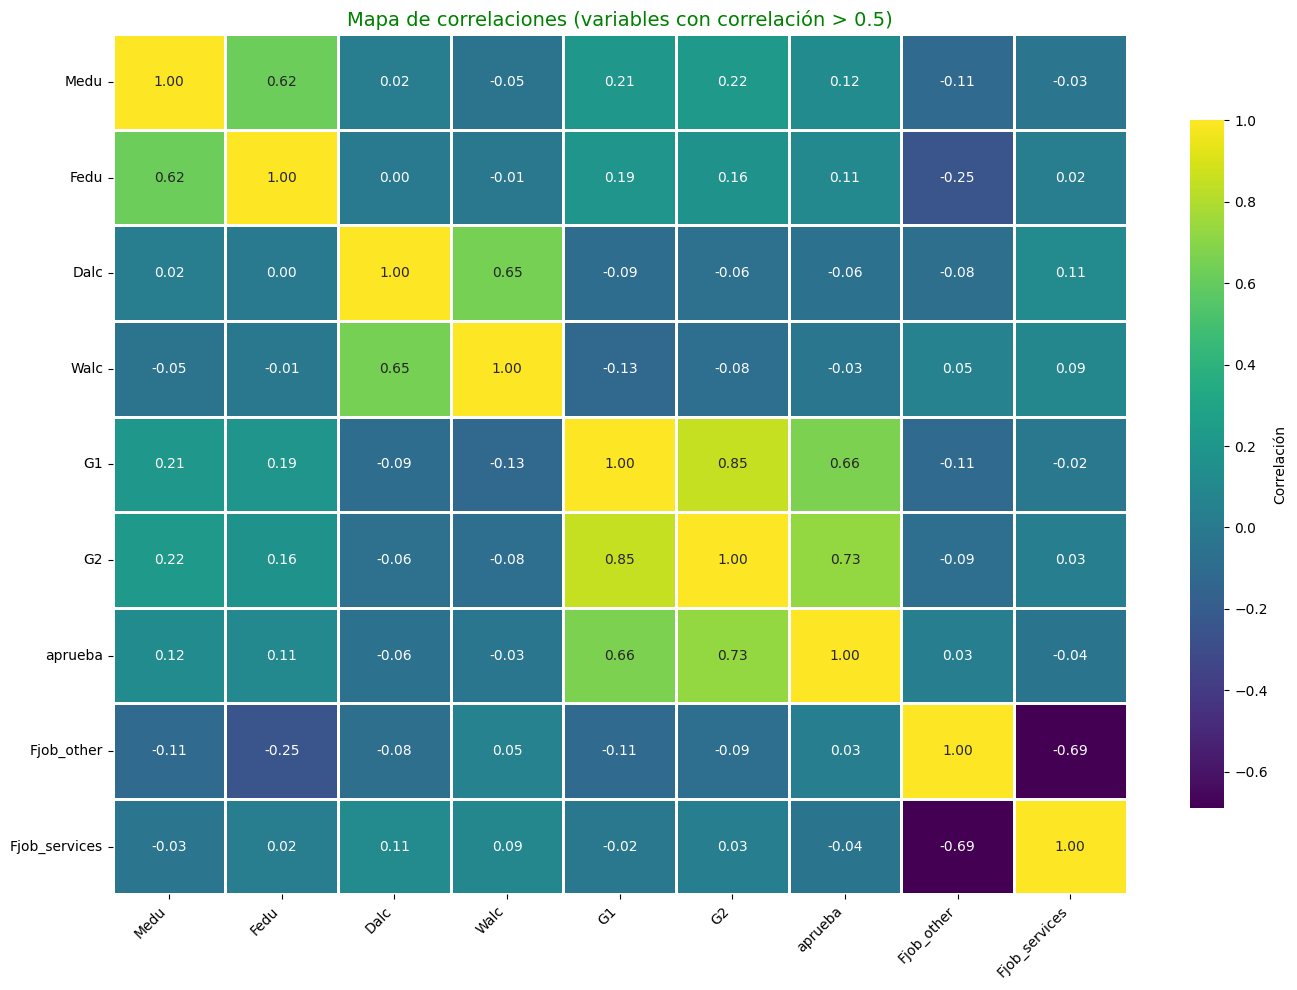

In [36]:
# Calcular la matriz de correlación
corr_matrix = datos_visualizacón.corr(numeric_only=True)

# Filtrar variables que tengan al menos una correlación > 0.5 (excluyendo la diagonal)
# Creamos una máscara para ignorar la diagonal (correlación consigo misma = 1)
mask_diagonal = np.eye(corr_matrix.shape[0], dtype=bool)
corr_sin_diagonal = corr_matrix.where(~mask_diagonal)

# Identificar columnas con al menos una correlación absoluta > 0.5
columnas_relevantes = corr_sin_diagonal.abs().max() > 0.5
variables_filtradas = corr_matrix.columns[columnas_relevantes].tolist()

# Crear submatriz con solo las variables relevantes
corr_filtrada = corr_matrix.loc[variables_filtradas, variables_filtradas]

print(f'Variables con correlación > 0.5: {len(variables_filtradas)} de {len(corr_matrix.columns)}')
print(f'Variables seleccionadas: {variables_filtradas}')

# Visualizar
plt.figure(figsize=(14, 10))
ax = sns.heatmap(
    corr_filtrada,
    annot=True,
    cmap='viridis',
    fmt='.2f',
    linewidths=0.8,
    cbar_kws={'shrink': 0.8, 'label': 'Correlación'}
)

plt.title('Mapa de correlaciones (variables con correlación > 0.5)', color='green', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

De esta manera definimos las variables mas correlacionadas con si aprobará o no . G1 y G2 

In [ ]:
#función de detección deoutliers
def outliers_deteccion(df, n):
    """
    Utiliza una tecnica de deteccion de outliers en la cual realiamoz unos quantils de todos los datos para poder conocer 
    los limites altos y bajos y poder detectar cuales salen de este rango 
    parametros: df: Los datos a utilizar | n: Columnas numericas 
    return: Devuelve un dataframe con los valores organizados de mayores outleirs a menores 
    """
    resultados = []

    for c in n:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1

        lim_inf = Q1 - (1.5 * IQR)
        lim_sup = Q3 + (1.5 * IQR)

        outliers = df[(df[c] < lim_inf) | (df[c] > lim_sup)]

        resultados.append({
            'Columna': c,
            'Outliers': len(outliers),
            'Porcentaje de outlier': round((len(outliers) / len(df))*100, 2)
        })

    df_resultados = pd.DataFrame(resultados)
    df_resultados  = df_resultados.sort_values(by='Outliers', ascending=False).reset_index(drop=True)

    return df_resultados

In [38]:
#Revisamos los outliers
resumen_out = outliers_deteccion(datos, numericas)
print(resumen_out)

       Columna  Outliers  Porcentaje de outlier
0     failures        83                  21.01
1    studytime        27                   6.84
2       famrel        26                   6.58
3     freetime        19                   4.81
4         Dalc        18                   4.56
5     absences        15                   3.80
6           G2        13                   3.29
7   traveltime         8                   2.03
8         Fedu         2                   0.51
9          age         1                   0.25
10        Medu         0                   0.00
11       goout         0                   0.00
12      health         0                   0.00
13        Walc         0                   0.00
14          G1         0                   0.00
15     aprueba         0                   0.00


En este caso revisando las fallas y las hora de estudio corresponden a datos netamente reales por lo que son necesarios para el modelo

/tmp/ipykernel_3097/1948819330.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_visualizacón[c], ax=axs[i] , palette='rocket', kde=True)
/tmp/ipykernel_3097/1948819330.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_visualizacón[c], ax=axs[i] , palette='rocket', kde=True)
/tmp/ipykernel_3097/1948819330.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_visualizacón[c], ax=axs[i] , palette='rocket', kde=True)
/tmp/ipykernel_3097/1948819330.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_visualizacón[c], ax=axs[i] , palette='rocket', kde=True)
/tmp/ipykernel_3097/1948819330.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_visualizacón[c], ax=axs[i] , palette='rocket', kde=True)
/tmp/ipykernel_3097/1948819330.py:7: Use

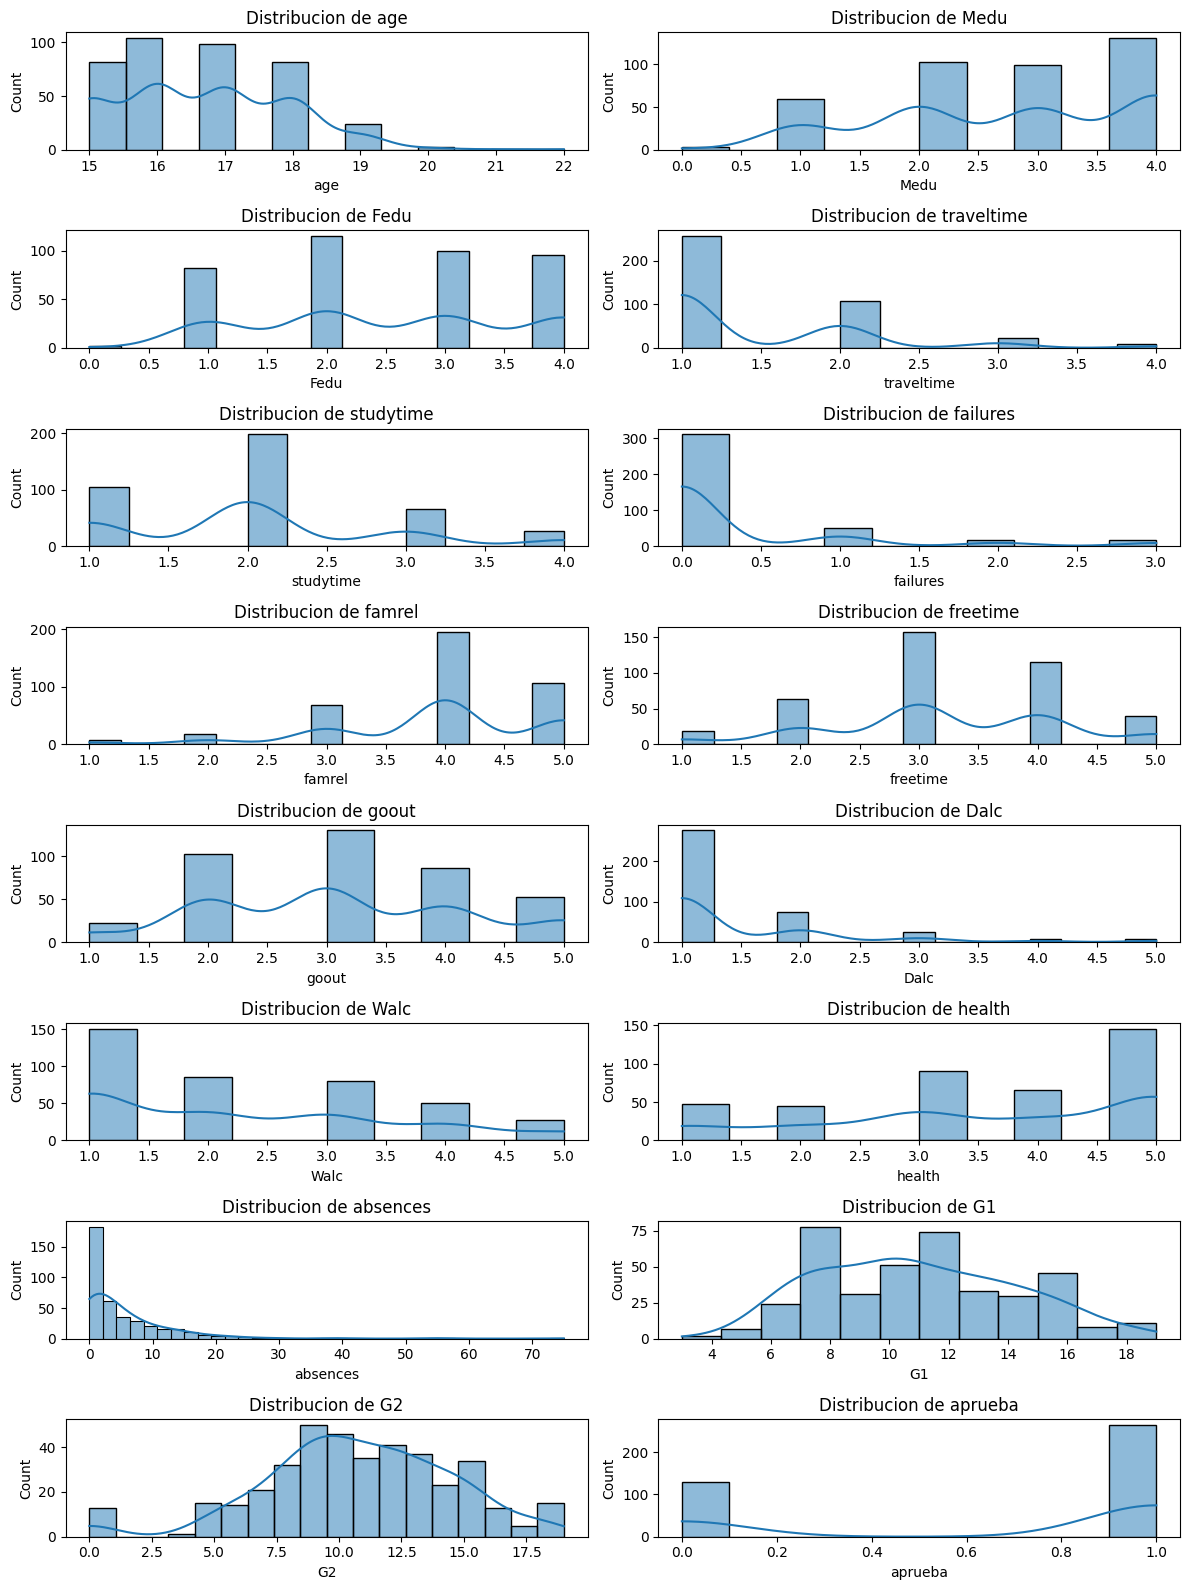

In [ ]:
#Graficar distribuciones de cada uno de las variables 
#Fijar los tamaños de cada una de las graficas 
fig, axs = plt.subplots(int(len(datos[numericas].columns)/2), 2, figsize=(12, 4 * 4))
axs = axs.flatten()
#Realizar las graficas y ajustar al axes al que pertenece
for i, c in enumerate(numericas):
    sns.histplot(datos_visualizacón[c], ax=axs[i] , palette='rocket', kde=True)
    axs[i].set_title(f'Distribucion de {c}')

plt.tight_layout()
plt.show()

Podemos observar el comportamiento de ciertas variables adicional vemos como hay mas casos de aprobaciones que desaprobaciones

In [75]:
#Revisar desbalanceo 
clases_counts = datos.groupby('aprueba')['aprueba'].count()
print(f'Clase No aprueba: {clases_counts[0]} | Clase Aprobacion: {clases_counts[1]}')
print(f'Hay un desbalanceo para la clase 0 de: {round(clases_counts[0] / (clases_counts[0] + clases_counts[1]), 2)}%')

Clase No aprueba: 130 | Clase Aprobacion: 265
Hay un desbalanceo para la clase 0 de: 0.33%


# Guardar el nuevo set de datos

In [55]:
#Explorar los datos que vamos a guardar con la nueva variable objetivo
datos.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,aprueba
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,0


In [56]:
#Guardar el modelo con la variable objetivo 
datos.to_csv('../data/student_new.csv', index=False)